<a href="https://colab.research.google.com/github/IshaniNag/Waste_Classification_CNN_Model/blob/main/wasteclassification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:05<00:00, 81.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [4]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label': y_data})

100%|██████████| 12565/12565 [00:06<00:00, 1829.02it/s]


In [6]:
data.shape

(22564, 2)

In [7]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

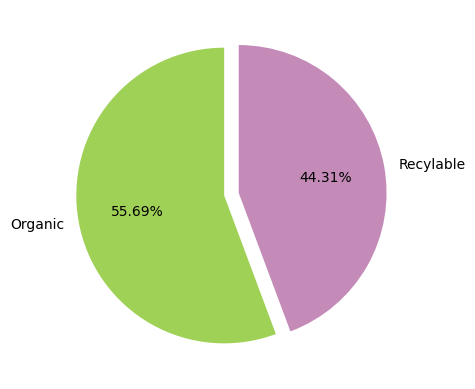

In [8]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recylable'], autopct='%0.2f%%', colors= colors, startangle = 90, explode=[0.05, 0.05])
plt.show()

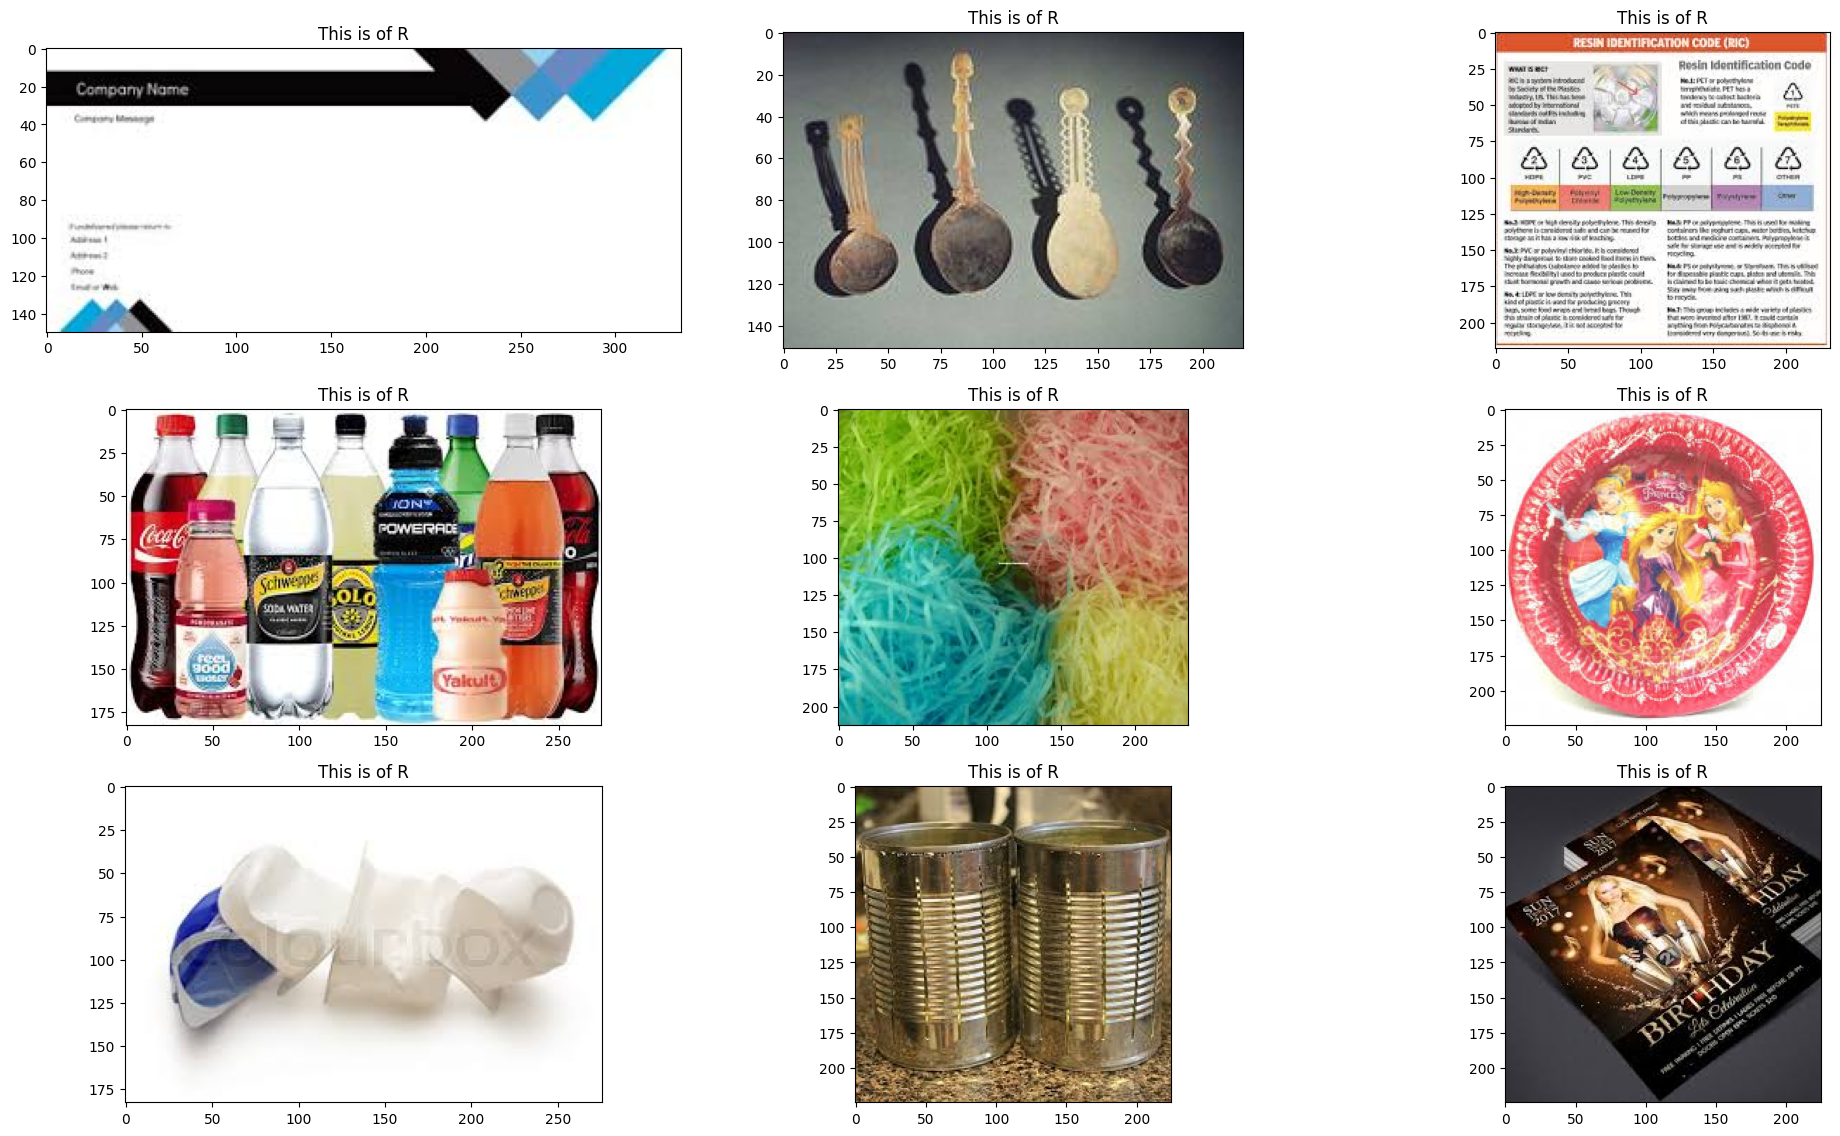

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
className = glob(train_path + '/*')
numberOfClass = len(className)
print("Number of Class: ",numberOfClass)

Number of Class:  2


CNN - Convolutional Neural Networks

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

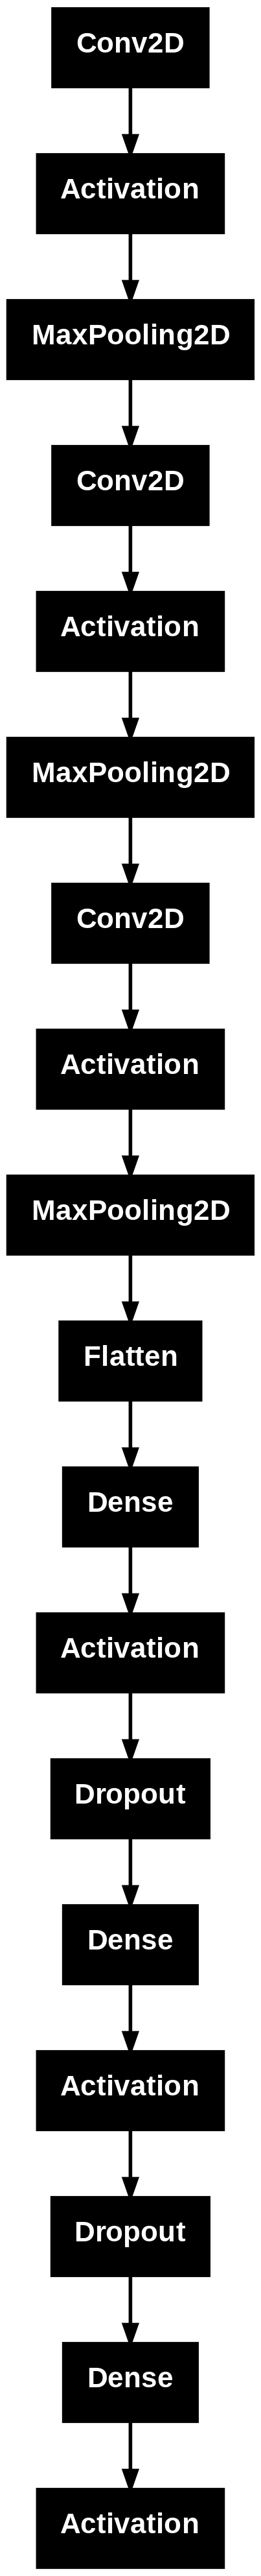

In [12]:
plot_model(model)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights = True
)

In [18]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 76s 182ms/step - accuracy: 0.7629 - loss: 0.5382 - val_accuracy: 0.8735 - val_loss: 0.4099
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.8337 - loss: 0.4064 - val_accuracy: 0.8818 - val_loss: 0.3024
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.8578 - loss: 0.3584 - val_accuracy: 0.9041 - val_loss: 0.2733
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.8697 - loss: 0.3266 - val_accuracy: 0.8973 - val_loss: 0.2619
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.8862 - loss: 0.2850 - val_accuracy: 0.9037 - val_loss: 0.2555
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.9072 - loss: 0.2398 - val_accuracy: 0.8770 - val_loss: 0.3330
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.9236 - loss: 0.2019 - val_accuracy: 0.8826 - val_loss: 0.3411
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.9409 - loss: 0

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
model.save('/content/drive/My Drive/wasteclassifier.h5')

In [21]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/wasteclassifier.h5')

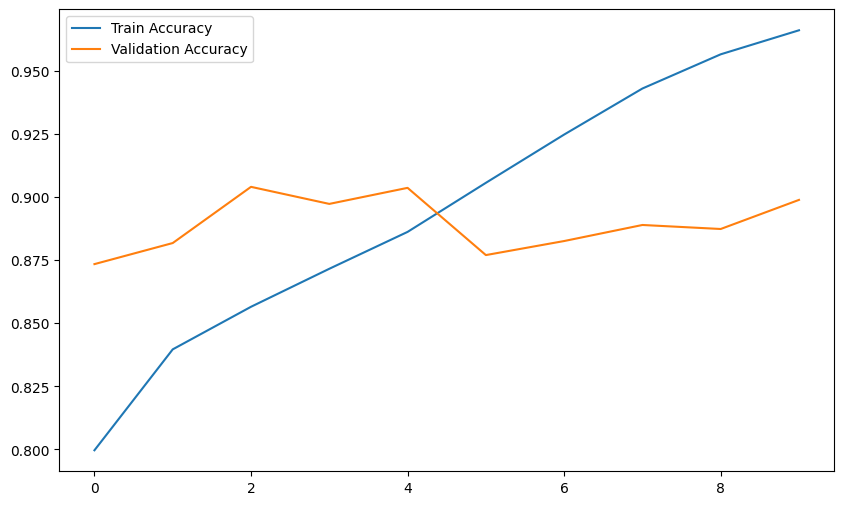

In [22]:
plt.figure(figsize=[10,6])
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

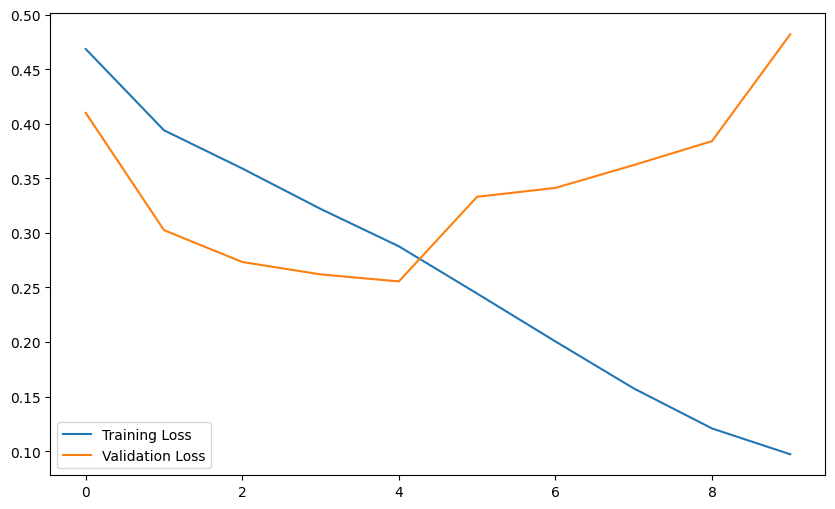

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [24]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224,224))
    img = np.reshape(img,[-1,224,224,3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print("The image shown is Recyclable")
    elif result == 1:
        print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The image shown is Organic Waste


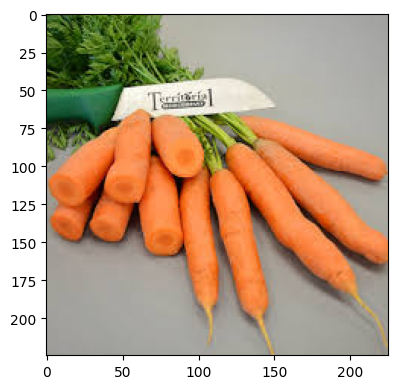

In [29]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12570.jpg')

if test_img is None:
    print("Error: Image not found. Check the file path.")
else:
    predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The image shown is Recyclable


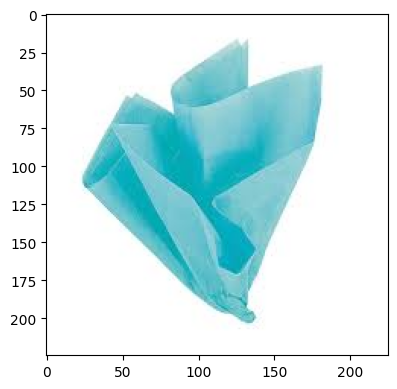

In [42]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10737.jpg')

if test_img is None:
    print("Error: Image not found. Check the file path.")
else:
    predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The image shown is Organic Waste


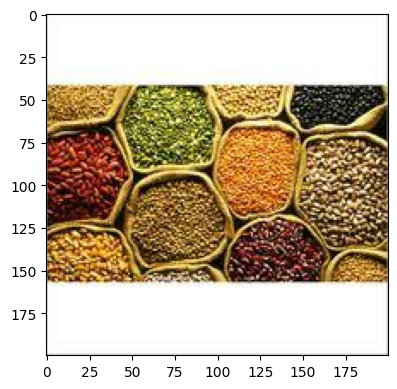

In [44]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_13478.jpg')

if test_img is None:
    print("Error: Image not found. Check the file path.")
else:
    predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The image shown is Recyclable


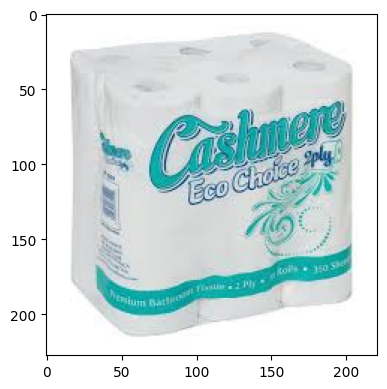

In [53]:
test_img = cv2.imread('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10888.jpg')

if test_img is None:
    print("Error: Image not found. Check the file path.")
else:
    predict_fun(test_img)